# Logistic Regression Evaluation


This notebook builds and evaluates Logistic Regression models on three feature sets using default parameters:
1. N-grams + BoW  
2. N-grams + TF-IDF  
3. BoW + TF-IDF

Each model reports:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix (Heatmap)
- ROC Curve and AUC


In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import vstack, hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)


In [5]:
# N-grams + BoW
with open("training_ngrams_countvec.pkl", "rb") as f:
    ngrams_bow = pickle.load(f)
X_ngb = hstack([
    vstack(ngrams_bow['body_countvec'].values),
    vstack(ngrams_bow['body_char_countvec'].values)
])
y_ngb = ngrams_bow['label'].values

# N-grams + TF-IDF
with open("training_ngrams_tfidf.pkl", "rb") as f:
    ngrams_tfidf = pickle.load(f)
X_ngt = hstack([
    vstack(ngrams_tfidf['body_tfidf'].values),
    vstack(ngrams_tfidf['body_char_tfidf'].values)
])
y_ngt = ngrams_tfidf['label'].values

# BoW + TF-IDF
with open("engineered_features_bow_tfidf.pkl", "rb") as f:
    bow_tfidf_dict = pickle.load(f)
bow_tfidf_df = pd.DataFrame(bow_tfidf_dict)
sampled = bow_tfidf_df
X_btf = hstack([
    vstack(bow_tfidf_df['X_bow'].values),
    vstack(bow_tfidf_df['X_tfidf'].values)
])
y_btf = bow_tfidf_df['label'].values


C:\Users\xitong\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\xitong\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\xitong\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from ver

C:\Users\xitong\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.959617006498983
Precision: 0.9468702290076336
Recall: 0.9695674830640959
F1 Score: 0.9580844490216271


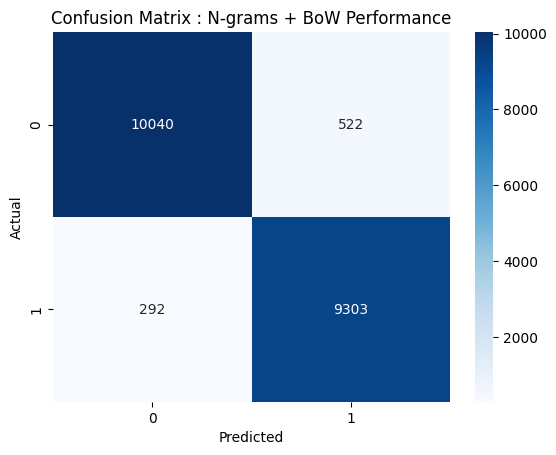

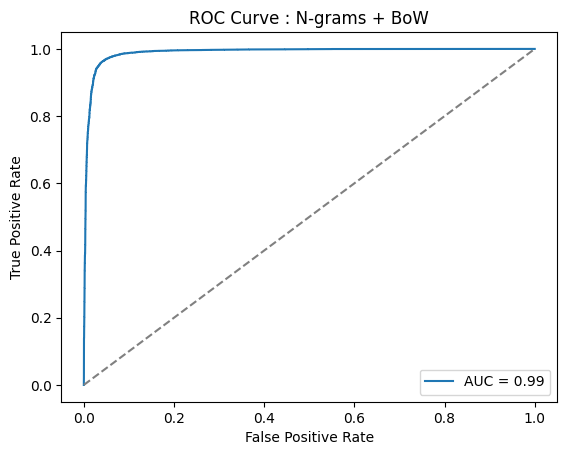

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ngb, y_ngb, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix : N-grams + BoW Performance")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# AUC:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : N-grams + BoW")
plt.legend()
plt.show()

Accuracy: 0.9637346827404871
Precision: 0.9574731626754748
Recall: 0.9667535174570089
F1 Score: 0.9620909609500596


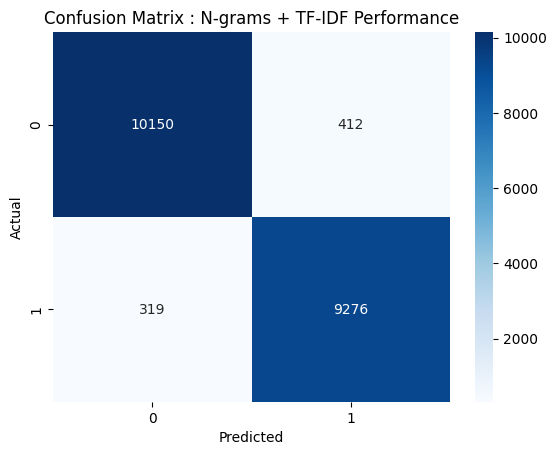

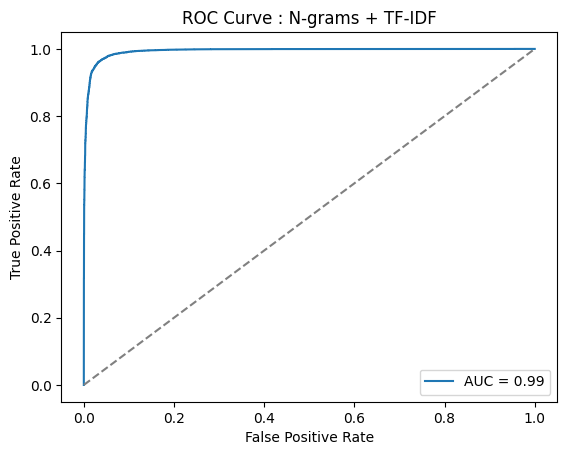

In [8]:
# N-grams + TF-IDF
X_train_ngt, X_test_ngt, y_train_ngt, y_test_ngt = train_test_split(X_ngt, y_ngt, test_size=0.2, random_state=42)
model_ngt = LogisticRegression(max_iter=1000)
model_ngt.fit(X_train_ngt, y_train_ngt)
y_pred_ngt = model_ngt.predict(X_test_ngt)


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions and probabilities
y_pred_ngt = model_ngt.predict(X_test_ngt)
y_prob_ngt = model_ngt.predict_proba(X_test_ngt)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test_ngt, y_pred_ngt))
print("Precision:", precision_score(y_test_ngt, y_pred_ngt))
print("Recall:", recall_score(y_test_ngt, y_pred_ngt))
print("F1 Score:", f1_score(y_test_ngt, y_pred_ngt))

# Confusion Matrix
conf_mat_ngt = confusion_matrix(y_test_ngt, y_pred_ngt)
sns.heatmap(conf_mat_ngt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix : N-grams + TF-IDF Performance")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
fpr_ngt, tpr_ngt, _ = roc_curve(y_test_ngt, y_prob_ngt)
auc_ngt = roc_auc_score(y_test_ngt, y_prob_ngt)

plt.plot(fpr_ngt, tpr_ngt, label=f"AUC = {auc_ngt:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : N-grams + TF-IDF")
plt.legend()
plt.show()


Accuracy: 0.9754664549424374
Precision: 0.9683991683991684
Recall: 0.9799713876967096
F1 Score: 0.9741509118286766


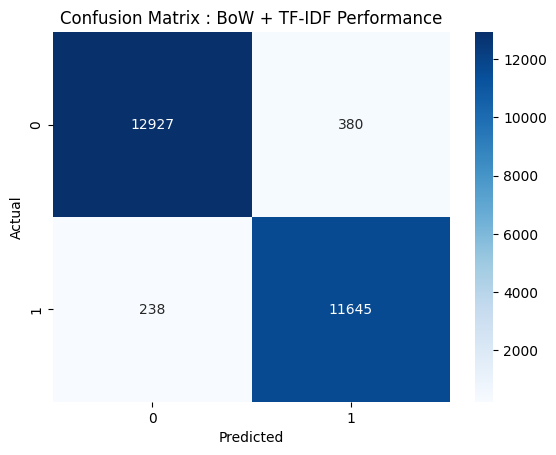

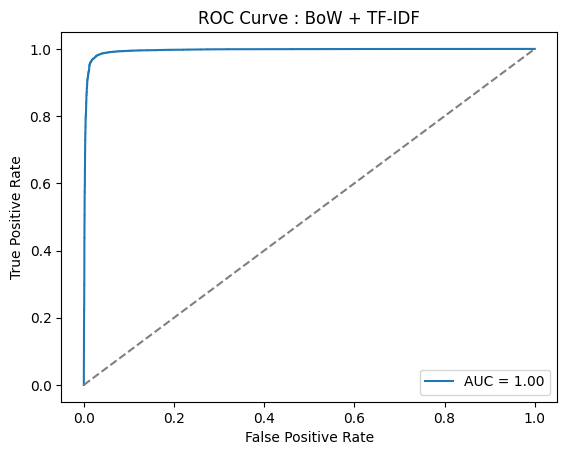

In [7]:
# BoW + TF-IDF
X_train_btf, X_test_btf, y_train_btf, y_test_btf = train_test_split(X_btf, y_btf, test_size=0.2, random_state=42)
model_btf = LogisticRegression(max_iter=1000)
model_btf.fit(X_train_btf, y_train_btf)
y_pred_btf = model_btf.predict(X_test_btf)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions and probabilities
y_pred_btf = model_btf.predict(X_test_btf)
y_prob_btf = model_btf.predict_proba(X_test_btf)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test_btf, y_pred_btf))
print("Precision:", precision_score(y_test_btf, y_pred_btf))
print("Recall:", recall_score(y_test_btf, y_pred_btf))
print("F1 Score:", f1_score(y_test_btf, y_pred_btf))

# Confusion Matrix
conf_mat_btf = confusion_matrix(y_test_btf, y_pred_btf)
sns.heatmap(conf_mat_btf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix : BoW + TF-IDF Performance")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC
fpr_btf, tpr_btf, _ = roc_curve(y_test_btf, y_prob_btf)
auc_btf = roc_auc_score(y_test_btf, y_prob_btf)

plt.plot(fpr_btf, tpr_btf, label=f"AUC = {auc_btf:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : BoW + TF-IDF")
plt.legend()
plt.show()


# Evaluation Summary: 

The BoW + TF-IDF feature combination achieved the best results across all major metrics. It had the highest accuracy and F1 score, and maintained excellent balance between precision and recall. This indicates that it is highly effective at detecting spam messages without misclassifying legitimate ones.



# Model Explainability for BoW + TF-IDF with Logistic Regression

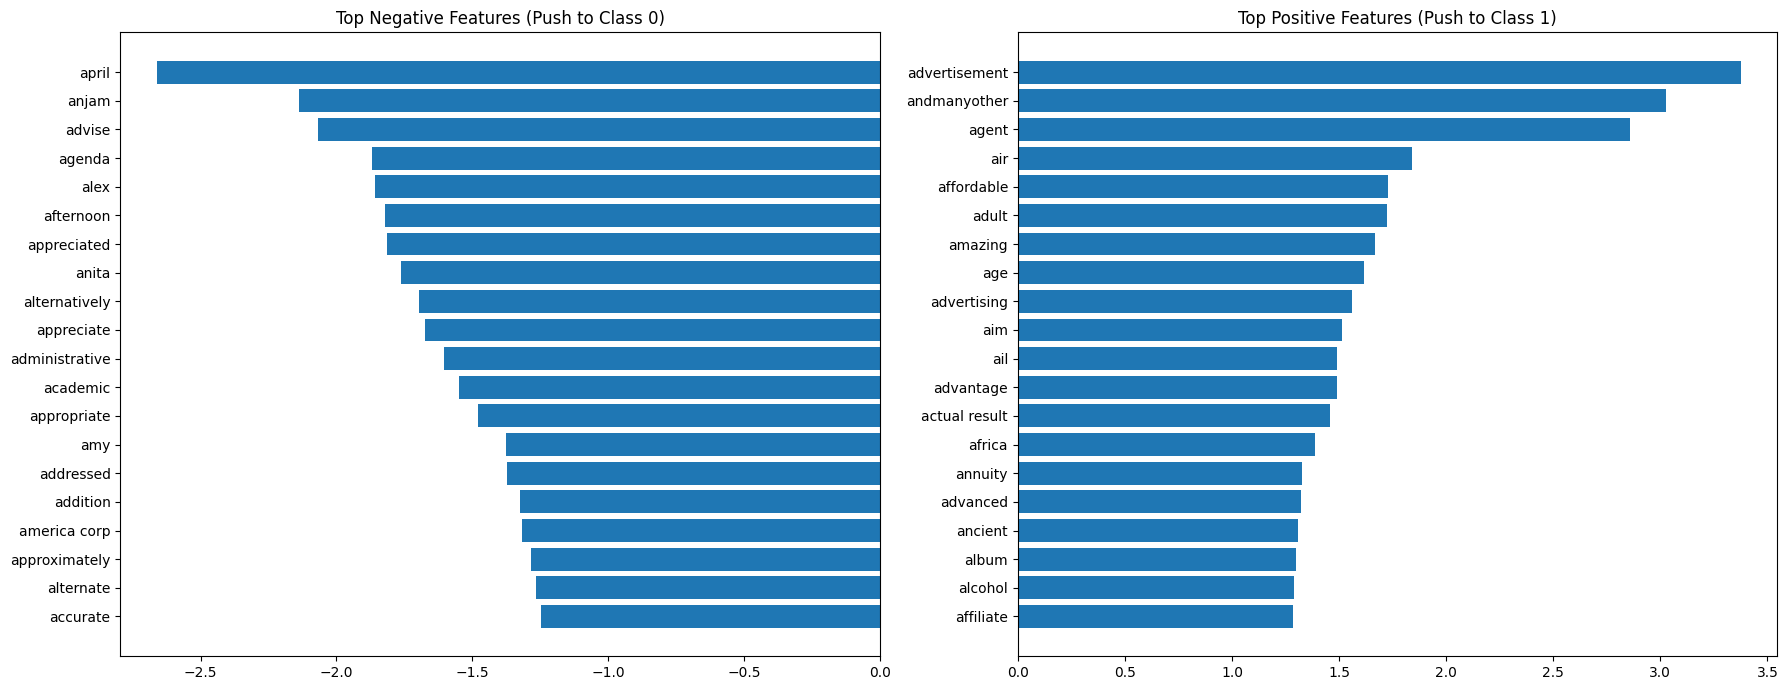

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack, vstack


X_bow_reduced = vstack([x[:, :500] for x in bow_tfidf_df["X_bow"].iloc[:3000]])
X_tfidf_reduced = vstack([x[:, :500] for x in bow_tfidf_df["X_tfidf"].iloc[:3000]])
X_btf_reduced = hstack([X_bow_reduced, X_tfidf_reduced])

y_btf_sample = bow_tfidf_df["label"].values[:3000]


feature_names_bow = bow_tfidf_dict["bow_vectorizer"].get_feature_names_out()[:500]
feature_names_tfidf = bow_tfidf_dict["tfidf_vectorizer"].get_feature_names_out()[:500]
feature_names = np.concatenate([feature_names_bow, feature_names_tfidf])


model = LogisticRegression(max_iter=1000)
model.fit(X_btf_reduced, y_btf_sample)


weights = model.coef_[0]
coef_tuples = list(zip(feature_names, weights))
coef_tuples.sort(key=lambda x: x[1])


top_n = 20
top_negative = coef_tuples[:top_n]
top_positive = coef_tuples[-top_n:]

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

axs[0].barh([k for k, _ in top_negative], [v for _, v in top_negative])
axs[0].set_title("Top Negative Features (Push to Class 0)")
axs[0].invert_yaxis()

axs[1].barh([k for k, _ in reversed(top_positive)], [v for _, v in reversed(top_positive)])
axs[1].set_title("Top Positive Features (Push to Class 1)")
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()


 # Insights:
The model has learned to distinguish formal/legitimate content vs. promotional/spammy content.

Words like advertisement and affordable are strong spam indicators.

Terms like agenda and afternoon signal more neutral or professional language.

